In [1]:
import os
import skimage
from skimage import io, util
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read some image that needs cropping

In [4]:
baseFolder = '/Users/vtymchenko/Dropbox/Shared/Retina'
imgFile = 'crop/20677_left.jpeg'
filename = os.path.join(baseFolder, imgFile)
img = skimage.io.imread(filename)

The simplest way to detect edges for cropping of an image with black background is to sum up along different axes. 
Let's see how it works. First we sum up all the color channels, then compute horizontal and vertical borders. Of course switch to float to avoid overfill.

In [5]:
s = np.sum(img, axis=2, dtype=float)
cols = np.sum(s, axis=0)
rows = np.sum(s, axis=1)

Lets see how it looks like

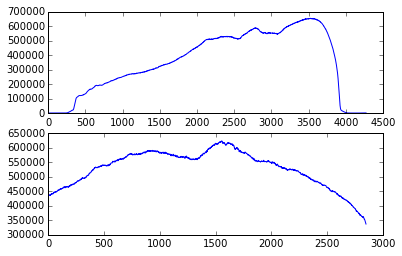

In [6]:
plt.figure(1)
plt.subplot(211)
plt.plot(cols)
plt.subplot(212)
plt.plot(rows)

The edges are sharp, so we just crop by threshould around 10000... Obviously we're looking for edges from each side to the center of the image.

In [17]:
left_border = np.argmax(cols[0:len(cols)/2] > 20000)
right_border = np.argmax(cols[len(cols)-1:len(cols)/2:-1] > 20000)
upper_border = np.argmax(rows[0:len(rows)/2] > 20000)
lower_border = np.argmax(rows[len(rows)-1:len(rows)/2:-1] > 20000)

print left_border, right_border, upper_border, lower_border

322 336 0 0


... and crop the image

In [18]:
img1 = skimage.util.crop(img, ((upper_border, lower_border),(left_border, right_border),  (0,0)))

(2848, 3614, 3)


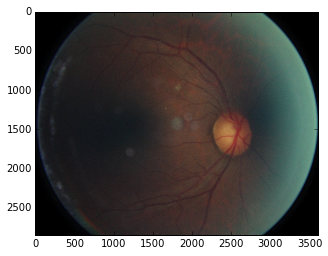

In [19]:
plt.imshow(img1)
print img1.shape

Putting everything together we get

In [21]:
def autocrop(img):
    threshold = 20000
    s = np.sum(img, axis=2)
    cols = np.sum(s, axis=0) > threshold  
    rows = np.sum(s, axis=1) > threshold
    
    left_border = np.argmax(cols[0:len(cols)/2])
    right_border = np.argmax(cols[len(cols)-1:len(cols)/2:-1])
    upper_border = np.argmax(rows[0:len(rows)/2])
    lower_border = np.argmax(rows[len(rows)-1:len(rows)/2:-1])
  
    return skimage.util.crop(img, ((upper_border, lower_border),(left_border, right_border),  (0,0)))

In [22]:
%timeit img1 = autocrop(img)

1 loops, best of 3: 276 ms per loop


5614336

In [20]:
np.sum(s, axis=0) > 0

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)